In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NG_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,NaN,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,NaN,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,NaN,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,NaN,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,NaN,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,NaN,0.0,0.054,0.0,NaN,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,NaN,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,NaN,NaN,0.00,0.00,...,0.0,NaN,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,NaN,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,NaN,0.0,0.032,0.0,0.065,0.000,NaN,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	319
float64		column 2	377
float64		column 3	613
float64		column 4	348
float64		column 5	526
float64		column 6	464
float64		column 7	522
float64		column 8	319
float64		column 9	580
float64		column 10	294
float64		column 11	352
float64		column 12	468
float64		column 13	497
float64		column 14	497
float64		column 15	377
float64		column 16	584
float64		column 17	464
float64		column 18	555
float64		column 19	555
float64		column 20	497
float64		column 21	493
float64		column 22	410
float64		column 23	439
float64		column 24	493
float64		column 25	522
float64		column 26	584
float64		column 27	584
float64		column 28	464
float64		column 29	410
float64		column 30	526
float64		column 31	381
float64		column 32	464
float64		column 33	377
float64		column 34	290
float64		column 35	468
float64		column 36	439
float64		column 37	497
float64		column 38	348
float64		column 39	468
float64		column 40	493
float64		column 41	352
float64		column 42	410
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4278.000000,4220.000000,3984.000000,4249.000000,4071.000000,4133.00000,4075.000000,4278.000000,4017.000000,4303.000000,...,4075.000000,4104.000000,4104.000000,4100.000000,4278.000000,4133.000000,4187.000000,4075.000000,4100.000000,4104.000000
mean,0.102169,0.191374,0.270670,0.068920,0.298912,0.09232,0.099075,0.100061,0.077329,0.227602,...,0.024160,0.028546,0.135383,0.015037,0.261305,0.073681,0.042562,5.064034,50.925366,273.942008
std,0.303408,1.190038,0.485262,1.447547,0.659261,0.26978,0.368491,0.393581,0.249644,0.578562,...,0.227363,0.173564,0.259266,0.101843,0.669716,0.235411,0.444516,30.901404,199.419256,589.823479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.619000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068000,0.000000,0.000000,0.000000,0.000000,2.324000,15.000000,97.000000
75%,0.000000,0.000000,0.400000,0.000000,0.360000,0.00000,0.000000,0.000000,0.000000,0.150000,...,0.000000,0.000000,0.183250,0.000000,0.313750,0.055000,0.000000,3.761000,44.000000,263.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.88000,7.270000,11.110000,3.330000,11.110000,...,8.330000,4.367000,9.752000,4.081000,19.131000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

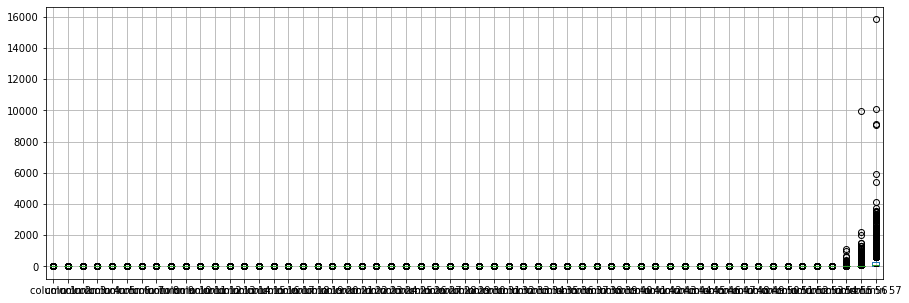

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.102169
column 2       0.191374
column 3       0.270670
column 4       0.068920
column 5       0.298912
column 6       0.092320
column 7       0.099075
column 8       0.100061
column 9       0.077329
column 10      0.227602
column 11      0.056987
column 12      0.535708
column 13      0.086212
column 14      0.051990
column 15      0.044528
column 16      0.226935
column 17      0.134633
column 18      0.169095
column 19      1.659332
column 20      0.073834
column 21      0.792010
column 22      0.109666
column 23      0.094716
column 24      0.078409
column 25      0.522876
column 26      0.224456
column 27      0.684441
column 28      0.106797
column 29      0.096007
column 30      0.092722
column 31      0.056241
column 32      0.041333
column 33      0.089351
column 34      0.041597
column 35      0.089312
column 36      0.087104
column 37      0.125961
column 38      0.011584
column 39      0.068029
column 40      0.055149
column 41      0.037032
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.010385,0.056210,0.015231,0.028350,0.061899,0.007235,0.000522,0.111525,0.051430,...,-0.022310,-0.017437,-0.020827,-0.034709,0.066630,0.113436,-0.008069,0.038080,0.047714,0.070635
column 2,-0.010385,1.000000,-0.024243,-0.007419,-0.023993,-0.024880,0.003398,-0.014334,0.001028,0.049551,...,-0.015585,-0.005468,-0.046373,-0.016202,-0.010661,-0.003360,-0.003417,0.004648,0.000120,-0.022241
column 3,0.056210,-0.024243,1.000000,-0.021720,0.084361,0.073358,0.027880,0.015425,0.091815,0.036531,...,-0.019710,-0.027419,-0.008575,-0.025152,0.133927,0.097635,-0.000498,0.054316,0.159856,0.071587
column 4,0.015231,-0.007419,-0.021720,1.000000,0.002275,-0.008261,0.013428,0.002843,-0.012551,-0.004982,...,0.000105,-0.001214,-0.013061,-0.006669,-0.004427,0.009481,-0.001356,0.006003,0.023016,0.024436
column 5,0.028350,-0.023993,0.084361,0.002275,1.000000,0.044176,0.142936,0.038159,0.028274,0.039644,...,-0.028714,-0.024381,-0.047373,-0.034768,0.026782,0.042702,-0.014811,0.044351,0.044905,0.004913
column 6,0.061899,-0.024880,0.073358,-0.008261,0.044176,1.000000,0.041044,0.086412,0.123600,0.015897,...,-0.027786,-0.021707,-0.020008,-0.006892,0.086847,0.107479,0.022338,-0.010596,0.061919,0.073545
column 7,0.007235,0.003398,0.027880,0.013428,0.142936,0.041044,1.000000,0.033957,0.071404,0.051736,...,-0.028425,-0.030485,-0.042266,-0.023409,0.064136,0.054643,0.055784,0.038931,0.052838,-0.002064
column 8,0.000522,-0.014334,0.015425,0.002843,0.038159,0.086412,0.033957,1.000000,0.117039,0.108209,...,-0.016294,-0.021157,-0.029152,-0.020155,0.046158,0.057201,-0.008584,0.009592,0.031063,0.035966
column 9,0.111525,0.001028,0.091815,-0.012551,0.028274,0.123600,0.071404,0.117039,1.000000,0.144337,...,-0.023489,-0.005857,-0.023810,0.010429,0.060187,0.149231,-0.000272,0.103951,0.146497,0.224391
column 10,0.051430,0.049551,0.036531,-0.004982,0.039644,0.015897,0.051736,0.108209,0.144337,1.000000,...,-0.014359,0.014900,0.012192,0.011292,0.043494,0.088531,0.052628,0.090155,0.103977,0.079708


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+24,17+24+24,17+24+24+24,17+24+24,17+24,17], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 580.0325374270981
Epoch: 1 , loss: 577.4800955210828
Epoch: 2 , loss: 578.0247498887757
Epoch: 3 , loss: 574.0442503819482
Epoch: 4 , loss: 577.4203476855979
Epoch: 5 , loss: 571.346634336465
Epoch: 6 , loss: 580.9745654594608
Epoch: 7 , loss: 574.1704887629386
Epoch: 8 , loss: 572.6489271104128
Epoch: 9 , loss: 574.2745540765104
Epoch: 10 , loss: 565.0566326234399
Epoch: 11 , loss: 557.8398420220883
Epoch: 12 , loss: 493.9687138201883
Epoch: 13 , loss: 455.2879293089544
Epoch: 14 , loss: 434.17151301580026
Epoch: 15 , loss: 437.0234056532591
Epoch: 16 , loss: 439.11186670177074
Epoch: 17 , loss: 419.1594742831453
Epoch: 18 , loss: 409.18236674664325
Epoch: 19 , loss: 404.88462087917
Epoch: 20 , loss: 401.78492245026166
Epoch: 21 , loss: 413.93658210674647
Epoch: 22 , loss: 433.99321520868494
Epoch: 23 , loss: 429.06173107931426
Epoch: 24 , loss: 412.9711080145753
Epoch: 25 , loss: 416.9273268935572
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.032534
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.000000,0.0,0.0,0.126916,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.019100,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.184544,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,-1.792974,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,-6.374983,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,-0.008235,0.000000,0.0,0.000000,0.030185,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4593,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.083654,0.000000,0.0,0.000000,0.0,0.000000,0.0
4594,0.0,0.0,0.000000,0.0,0.0,0.000000,0.017778,0.087057,0.0,0.0,...,0.000000,0.048698,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4595,0.0,0.0,-0.362231,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,-0.058517,0.000000,0.0,0.000000,0.000000,0.0,0.176861,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

17135.436420495775

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.36106031434434577

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.198222
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18     -0.004946
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23     -0.149180
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30     -0.061315
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.640000,0.0,0.32,0.126916,0.000000,0.000000,0.00,0.00,...,0.000000,0.000000,0.000,0.000000,0.778000,0.000,0.000000,3.756,61.000000,278.0
1,0.21,0.28,0.500000,0.0,0.14,0.280000,0.210000,0.070000,0.00,0.94,...,0.000000,0.000000,0.132,0.019100,0.372000,0.180,0.048000,5.114,101.000000,1028.0
2,0.00,0.00,0.184544,0.0,0.63,0.000000,0.310000,0.630000,0.31,0.63,...,0.000000,0.000000,0.135,0.000000,0.135000,0.000,0.000000,3.537,40.000000,191.0
3,0.00,0.00,0.000000,0.0,1.85,0.000000,0.000000,0.057026,0.00,0.00,...,0.000000,0.000000,0.223,0.000000,0.000000,0.000,0.000000,3.000,8.625017,54.0
4,0.00,0.00,0.000000,0.0,1.92,0.000000,0.000000,0.000000,0.00,0.64,...,-0.008235,0.000000,0.054,0.000000,0.194185,0.054,0.000000,1.671,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.640000,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.000000,0.000000,0.348,0.000000,1.160000,0.000,0.000000,3.121,15.000000,103.0
4593,0.00,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.000000,0.000000,0.000,0.083654,0.000000,0.000,0.000000,3.043,15.000000,70.0
4594,0.00,0.00,0.000000,0.0,0.00,0.000000,0.017778,0.087057,0.00,0.00,...,0.000000,0.048698,0.136,0.000000,0.000000,0.000,0.409000,1.837,12.000000,68.0
4595,0.17,0.00,0.317769,0.0,0.34,0.340000,0.000000,0.000000,0.00,0.00,...,-0.058517,0.000000,0.032,0.000000,0.065000,0.000,0.176861,1.189,5.000000,69.0


In [21]:
imputations[-1].to_excel("Spam_NG_10(imp).xlsx", index=False, header=False)